In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
os.makedirs("train", exist_ok=True)
os.makedirs("val", exist_ok=True)

In [4]:
from zipfile import ZipFile
def unzip_data(file_path, extract_path):
    with ZipFile(file_path, 'r') as zip:
        zip.extractall(extract_path)
        zip.close()

In [5]:
unzip_data("/content/drive/MyDrive/RORD-small-dataset/gt.zip", "train")

In [6]:
unzip_data("/content/drive/MyDrive/RORD-small-dataset/img.zip", "train")

In [7]:
unzip_data("/content/drive/MyDrive/RORD-small-dataset/label.zip", "train")

In [8]:
unzip_data("/content/drive/MyDrive/RORD-small-dataset/mask.zip", "train")

In [9]:
unzip_data("/content/drive/MyDrive/RORD-small-dataset/val.zip", ".")

In [10]:
!rm -rf /*/*/__MACOSX

In [11]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (42.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [12]:
!tree train -L 1

train
├── gt
├── img
├── label
└── mask

4 directories, 0 files


In [13]:
!tree train/gt -L 1

train/gt
├── I-210614_O04019_W01
├── I-210614_O04019_W03
├── I-210614_O04019_W04
├── I-210618_I01001_T04
├── I-210618_I01001_T05
├── I-210618_I01001_T07
├── I-210618_I01001_W02
├── I-210618_I01001_W03
├── I-210618_I01001_W06
├── I-210618_I01006_T02
├── I-210618_I01006_W03
├── I-210626_O01001_T06
├── I-210626_O01001_W04
├── I-210626_O01001_W05
├── I-210627_O01004_T02
├── I-210627_O01004_T05
├── I-210627_O01004_W07
├── I-210627_O04018_T03
├── I-210627_O04018_T04
├── I-210627_O04018_T08
├── I-210627_O04018_T09
├── I-210627_O04018_T10
├── I-210627_O04018_W06
├── I-210627_O04018_W07
├── I-210703_O01001_T07
├── I-210707_O04018_W01
├── I-210707_O04018_W02
├── I-210707_O04018_W03
├── I-210707_O04018_W04
├── I-210709_O01007_T03
├── I-210709_O01007_W01
├── I-210713_I02010_T03
├── I-210713_I02010_W02
├── I-210713_I03013_T06
├── I-210713_I03013_W04
├── I-210714_O01001_T01
├── I-210714_O01001_T06
├── I-210714_O01001_W04
├── I-210714_O01002_T05
├── I-210714_O01002_T06
├── I-210714_O01002_W01
├── I-2

In [14]:
!tree train/gt/I-210722_O01007_W01/ -L 1

train/gt/I-210722_O01007_W01/
├── I-210722_O01007_W01_F0002.jpg
├── I-210722_O01007_W01_F0006.jpg
├── I-210722_O01007_W01_F0032.jpg
├── I-210722_O01007_W01_F0035.jpg
├── I-210722_O01007_W01_F0064.jpg
├── I-210722_O01007_W01_F0100.jpg
├── I-210722_O01007_W01_F0144.jpg
├── I-210722_O01007_W01_F0156.jpg
├── I-210722_O01007_W01_F0170.jpg
└── I-210722_O01007_W01_F0176.jpg

0 directories, 10 files


In [15]:
import os

def remove_stale_files(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.startswith("._"):
                os.remove(os.path.join(root, file))
                print(f"Removed: {os.path.join(root, file)}")

# Run this on your dataset directories
remove_stale_files("train/img")
remove_stale_files("train/mask")
remove_stale_files("train/gt")
remove_stale_files("train/label")
remove_stale_files("val/img")
remove_stale_files("val/mask")
remove_stale_files("val/gt")
remove_stale_files("val/label")

Streaming output truncated to the last 5000 lines.
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0046.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0095.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0060.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0039.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0081.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0038.jpg
Removed: val/gt/I-210910_O12054_T03/._I-210910_O12054_T03_F0195.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0036.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0049.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0077.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0051.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0081.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0027.jpg
Removed: val/gt/I-211223_O07032_W28/._I-211223_O07032_W28_F0003.j

In [16]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class ObjectRemovalDataset(Dataset):
    def __init__(self, data_type="train", transform=None):
        self.data_type = data_type
        self.img_dir = f"{self.data_type}/img"
        self.mask_dir = f"{self.data_type}/mask"
        self.gt_dir = f"{self.data_type}/gt"
        self.input_dir = f"{self.data_type}/input"

        # create folders for input_dir
        self.folders_li = self.filter_files(os.listdir(self.img_dir))
        os.makedirs(self.input_dir, exist_ok=True)
        for folder in self.folders_li:
            os.makedirs(f"{self.input_dir}/{folder}", exist_ok=True)

        self.files_li = self.get_basename(self.img_dir)
        self.img_files = [f"{file}.jpg" for file in self.files_li]
        self.mask_files = [f"{file}_M.png" for file in self.files_li]
        self.gt_files = [f"{file}.jpg" for file in self.files_li]
        self.input_files = [f"{file}_infused.jpg" for file in self.files_li]

        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def filter_files(self, files_li):
        return [f for f in files_li if not f.startswith("._")]

    def get_basename(self, dir_path):
        files_li = list()
        for folder in self.folders_li:
            files = self.filter_files(os.listdir(os.path.join(dir_path, folder)))
            for _file in files:
                file_path = f"{folder}/{_file}".split('.')[0]
                files_li.append(file_path)
        return files_li

    def infuse_image_mask(self, img_path, mask_path, input_path):
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        # Convert to NumPy for masking
        img_np = np.array(img)
        mask_np = np.array(mask)
        mask_np = np.where(mask_np > 0, 1, 0).astype(np.uint8)

        # Apply mask
        img_np[mask_np == 0] = [0, 0, 0]
        img_infused = Image.fromarray(img_np)
        img_infused.save(input_path)
        return input_path


    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])
        gt_path = os.path.join(self.gt_dir, self.gt_files[idx])
        input_path = os.path.join(self.input_dir, self.input_files[idx])

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Grayscale mask
        gt = Image.open(gt_path).convert("RGB")
        input_data = Image.open(self.infuse_image_mask(img_path, mask_path, input_path)).convert("RGB")

        if self.transform:
            # img = self.transform(img)
            # mask = self.transform(mask)
            gt = self.transform(gt)
            input_data = self.transform(input_data)

        # Concatenate input image and mask (mask remains 1 channel)
        return input_data, gt

# Transformations
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

In [17]:
# Create dataset and dataloaders
train_dataset = ObjectRemovalDataset(data_type="train", transform=transform)
val_dataset = ObjectRemovalDataset(data_type="val", transform=transform)

num_workers = os.cpu_count()

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=num_workers, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=num_workers, drop_last=True)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def infuse_image_mask(img_path, mask_path, input_path):
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        # Convert to NumPy for masking
        img_np = np.array(img)
        mask_np = np.array(mask)
        mask_np = np.where(mask_np > 0, 1, 0).astype(np.uint8)

        # Apply mask
        img_np[mask_np == 0] = [0, 0, 0]
        img_infused = Image.fromarray(img_np)
        img_infused.save(input_path)
        plt.imshow(img_infused)
        plt.axis("off")
        return input_path

'result.jpg'

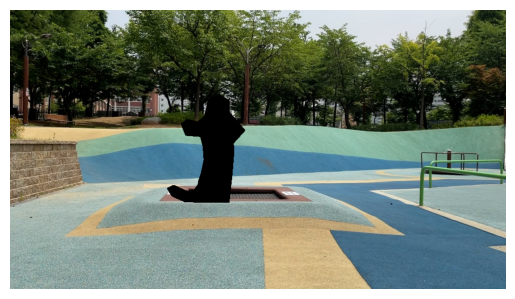

In [19]:
_img_path = "/content/train/img/I-210614_O04019_W01/I-210614_O04019_W01_F0014.jpg"
_mask_path = "/content/train/mask/I-210614_O04019_W01/I-210614_O04019_W01_F0014_M.png"
infuse_image_mask(_img_path, _mask_path, "result.jpg")

In [20]:
os.listdir("/content/train/img/I-210614_O04019_W01")

['I-210614_O04019_W01_F0159.jpg',
 'I-210614_O04019_W01_F0080.jpg',
 'I-210614_O04019_W01_F0112.jpg',
 'I-210614_O04019_W01_F0030.jpg',
 'I-210614_O04019_W01_F0091.jpg',
 'I-210614_O04019_W01_F0150.jpg',
 'I-210614_O04019_W01_F0161.jpg',
 'I-210614_O04019_W01_F0122.jpg',
 'I-210614_O04019_W01_F0100.jpg',
 'I-210614_O04019_W01_F0014.jpg']

In [21]:
os.listdir("/content/train/mask/I-210614_O04019_W01")

['I-210614_O04019_W01_F0161_M.png',
 'I-210614_O04019_W01_F0112_M.png',
 'I-210614_O04019_W01_F0150_M.png',
 'I-210614_O04019_W01_F0100_M.png',
 'I-210614_O04019_W01_F0091_M.png',
 'I-210614_O04019_W01_F0030_M.png',
 'I-210614_O04019_W01_F0014_M.png',
 'I-210614_O04019_W01_F0122_M.png',
 'I-210614_O04019_W01_F0159_M.png',
 'I-210614_O04019_W01_F0080_M.png']

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize samples
def visualize_samples(dataloader, num_samples=4):
    # Get one batch of data
    data_iter = iter(dataloader)
    input_data, gt_data = next(data_iter)  # First batch


    for i in range(num_samples):
        # Extract individual sample
        input_sample = input_data[i]
        gt_sample = gt_data[i]

        # print(input_sample.shape)
        # print(gt_sample.shape)
        # print()

        plt.figure(figsize=(10,10))
        plt.subplot(1, 2, 1)
        plt.imshow(input_sample.permute(1, 2, 0).numpy())
        plt.title("Input Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(gt_sample.permute(1, 2, 0).numpy())
        plt.title("Ground Truth")
        plt.axis("off")

        plt.show()

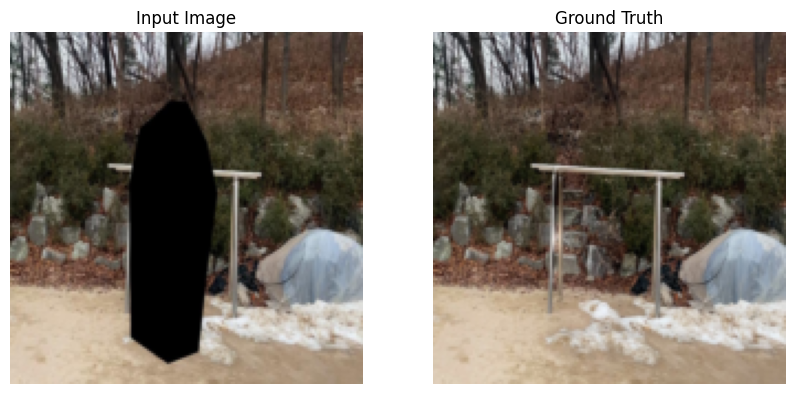

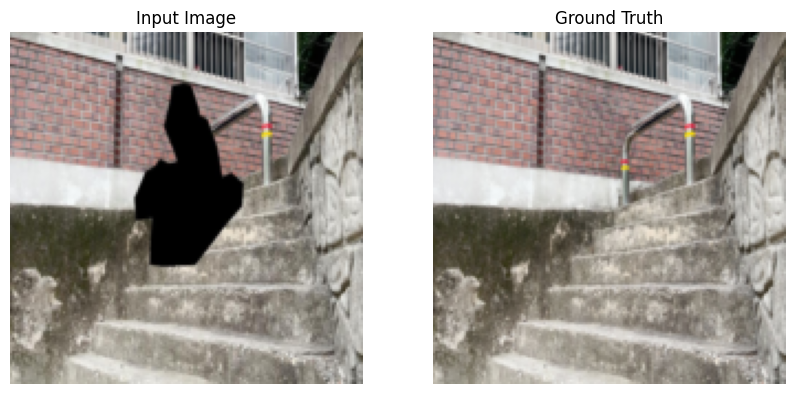

In [23]:
visualize_samples(train_loader, 2)

In [ ]:
!curl -L http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar -o resnet50_places365.pth.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92.7M  100 92.7M    0     0  11.7M      0  0:00:07  0:00:07 --:--:-- 17.6M


In [ ]:
!git clone https://github.com/NVIDIA/partialconv.git

Cloning into 'partialconv'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 169 (delta 97), reused 164 (delta 97), pack-reused 1 (from 1)
Receiving objects: 100% (169/169), 475.90 KiB | 19.83 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [24]:
import torch
import torch.nn as nn
from torchvision import models

# Load Pretrained ResNet50 Places365
# resnet_places = models.resnet50()
# checkpoint = torch.load('resnet50_places365.pth.tar', map_location=torch.device("cpu"))
# resnet_places.load_state_dict(checkpoint['state_dict'], strict=False)

# Modify the model for inpainting
class InpaintingModel(nn.Module):
    def __init__(self, chkpt_path, _device):
        super(InpaintingModel, self).__init__()
        resnet_places = models.resnet50()
        if chkpt_path:
            checkpoint = torch.load(chkpt_path, map_location=torch.device(_device))
            resnet_places.load_state_dict(checkpoint['state_dict'], strict=False)
        self.encoder = nn.Sequential(*list(resnet_places.children())[:-2])
        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(2048, 1024, kernel_size=4, stride=2, padding=1),
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(512, 3, kernel_size=4, stride=2, padding=1),
        #     nn.Sigmoid()
        # )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2048, 1024, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1),  # Final layer to match 640x640
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [25]:
def validate_model(model, dataloader, criterion, device):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, gts in dataloader:
            inputs, gts = inputs.to(device), gts.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, gts)
            val_loss += loss.item()
    return val_loss / len(dataloader)

In [26]:
import time
import torch.nn.functional as F
import os
import gc

# os.makedirs("checkpoints", exist_ok=True)

def save_checkpoint(model, optimizer, epoch, loss, filename="checkpoint.pth"):
    """Saves model checkpoint"""
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, filename)
    # files.download(filename)
    print(f"Checkpoint saved at epoch {epoch}.")

def train_model(model, dataloader, criterion, optimizer, device, start_epoch=1, num_epochs=10, save_dir='./checkpoints'):
    model.to(device)
    model.train()

    # Create a directory for saving checkpoints if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(start_epoch, num_epochs + start_epoch):
        print(f"Training started for epoch {epoch}")
        # start time
        st = time.time()

        epoch_loss = 0.0
        for inputs, gts in dataloader:
            inputs, gts = inputs.to(device), gts.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, gts)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # end time
        et = time.time()
        time_spent = et - st

        print(f"Epoch [{epoch}/{num_epochs + start_epoch - 1}], Loss: {epoch_loss/len(dataloader):.4f}, Time Spent: {time_spent:.2f}")

        # Save checkpoint after every epoch
        checkpoint_filename = os.path.join(save_dir, f"checkpoint_epoch_{epoch}.pth")
        save_checkpoint(model, optimizer, epoch, epoch_loss/len(dataloader), checkpoint_filename)
        gc.collect()

In [27]:
# Prepare the input image
def make_inference(model, img_path, mask_path, result_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    img = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    # Convert to NumPy for masking
    img_np = np.array(img)
    mask_np = np.array(mask)
    mask_np = np.where(mask_np > 0, 1, 0).astype(np.uint8)

    # Apply mask
    input_path = "input.jpg"
    img_np[mask_np == 0] = [0, 0, 0]
    img_infused = Image.fromarray(img_np)
    img_infused.save(input_path)

    # model inference
    input_img = Image.open(input_path).convert("RGB")
    input_img = transform(input_img).to(device).unsqueeze(0)
    output = None
    with torch.no_grad():
        ouput = model(input_img)

    if output:
        output = output.squeeze(0).detach().cpu()

    return ouput[0]

In [28]:
# model preparation
def test(chkpt_no):
    chkpt_path = f'/content/drive/MyDrive/Checkpoints/checkpoint_epoch_{chkpt_no}.pth'
    model = InpaintingModel(chkpt_path=None, _device="cpu")
    checkpoint = torch.load(chkpt_path, map_location="cpu")
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    img_path = "/content/train/img/I-210614_O04019_W01/I-210614_O04019_W01_F0014.jpg"
    mask_path = "/content/train/mask/I-210614_O04019_W01/I-210614_O04019_W01_F0014_M.png"
    result_path = "result.jpg"
    output = make_inference(model, img_path, mask_path, result_path)
    output = output.cpu().detach().numpy().transpose(1, 2, 0)

    output_np = np.array(output)
    plt.imshow(output_np)
    plt.axis("off")
    plt.show()

<ipython-input-28-724a773f05f9>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(chkpt_path, map_location="cpu")


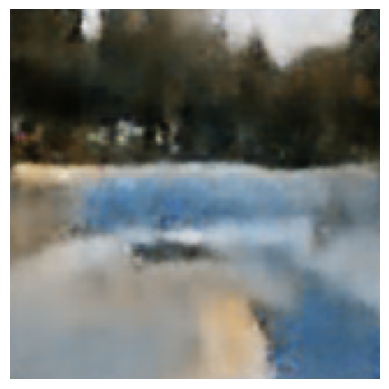

In [29]:
test(chkpt_no=18)

In [30]:
def train(epoch_no, num_epochs):
    chkpt_path = f'/content/drive/MyDrive/Checkpoints/checkpoint_epoch_{epoch_no - 1}.pth'
    print(f"Loaded Checkpoint {epoch_no-1}")
    model = InpaintingModel(chkpt_path=None, _device="cuda" if torch.cuda.is_available() else "cpu")
    checkpoint = torch.load(chkpt_path, map_location="cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(checkpoint['model_state_dict'])
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, criterion, optimizer, device='cuda', start_epoch=epoch_no, num_epochs=num_epochs, save_dir='/content/drive/MyDrive/Checkpoints/')

In [ ]:
train(epoch_no=19, num_epochs=4)

Loaded Checkpoint 18


<ipython-input-30-d2df67eb5b3b>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(chkpt_path, map_location="cuda" if torch.cuda.is_available() else "c

Training started for epoch 19


In [ ]:
test(chkpt_no=22)